<a href="https://colab.research.google.com/github/febse/econ2025/blob/main/11-Confidence-Intervals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Inference

## Confidence Intervals

$$
y = 2 + 3 x_1 + 2 x_2 + \epsilon, \quad \epsilon \sim N(0, \sigma^2)
$$

Calculate the 95 percent confidence intervals for the coefficients of the linear model.

$$
P\left(t_{0.025}(n - p) SE(\hat{\beta}_1) \leq \beta_k \leq  t_{0.975}(n - p) SE(\hat{\beta}_1) \right) = 0.95
$$

- Calculate the limits of the confidence intervals for the coefficients of the linear model for each simulation run.
- Plot the boundaries of the confidence intervals for the $x_1$ coefficient (use an error bar plot).
- Create a an indicator variable that indicates whether the confidence interval contains the true value of the coefficient.
- Count how many of the confidence intervals contain the true value of the coefficient.
- Compare this to the expected number of confidence intervals that should contain the true value of the coefficient.


In [ ]:
library(tidyverse)
library(broom)

set.seed(123)  # For reproducibility

sigma <- 2
n <- 100  # Number of observations
R <- 1000

sim <- tibble(
  x_1 = runif(n*R, 0, 1),
  x_2 = runif(n*R, 0, 1),
  e = rnorm(n*R, mean = 0, sd = sigma),
  y = 2 + 3 * x_1 + 2 * x_2 + e,
  R = rep(1:R, each = n)

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


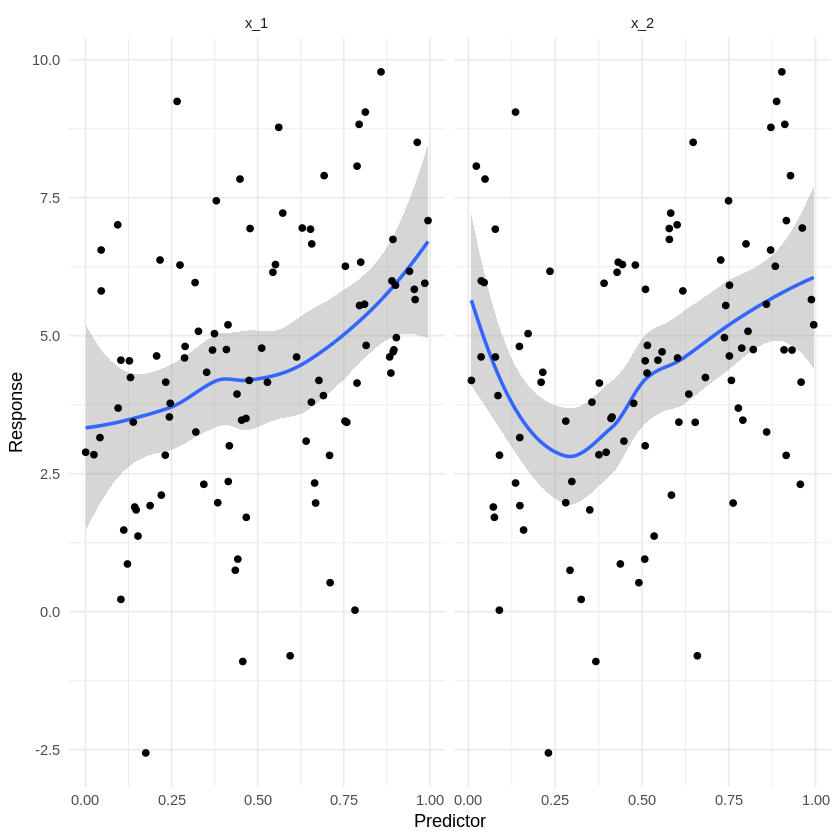

In [25]:
# Visualize the data in a grid layout with one columns for x_1 and y and another for x_2 and y
sim %>%
    filter(R == 1) %>%
    pivot_longer(cols = c(x_1, x_2), names_to = "x", values_to = "value") %>%
    ggplot(aes(x = value, y = y)) +
    geom_smooth() +
    geom_point() +
    facet_wrap(~ x, scales = "free_x") +
    labs(x = "Predictor", y = "Response") +
    theme_minimal()

In [ ]:
# Fit a linear model to each simulation

sim_models <- sim %>%
  group_by(R) %>%
  do(model = lm(y ~ x_1 + x_2, data = .)) %>%
  ungroup() %>%
  mutate(tidy_model = map(model, tidy)) %>%
  unnest(tidy_model)


In [ ]:
sim_models %>% head()

In [ ]:
# Plot the boundaries of the confidence intervals for the x_1 coefficient

sim_models %>%
  filter(term == "x_1") %>%
  filter(R < 100) %>%
  ggplot(aes(x = estimate, y = R)) +
  geom_point() +
  geom_errorbar(aes(xmin = estimate - std.error * qt(0.975, df = n - 3),
                    xmax = estimate + std.error * qt(0.975, df = n - 3))) +
  labs(x = "Coefficient Estimate", y = "Simulation Run")

In [ ]:
sim_models <- sim_models %>%
  mutate(
    lower = estimate - std.error * qt(0.975, df = n - 3),
    upper = estimate + std.error * qt(0.975, df = n - 3),
    contains_true_value = ifelse(lower <= 3 & upper >= 3, TRUE, FALSE)
  )

## Multiple Tests

In [ ]:
# Create a matrix of 101 normally distributed random numbers with mean 0 and standard deviation 1

set.seed(123)
random_matrix <- matrix(rnorm(101 * 101, mean = 0, sd = 1), nrow = 101 * 100, ncol = 101)
# Convert the matrix to a data frame
random_df <- as_tibble(random_matrix)

# Run a linear regression model for the first column of the data frame against all other columns


random_df %>% head()

In [ ]:
fit <- lm(V1 ~ ., data = random_df)
summary(fit)

fit_dt <- tidy(fit)
fit_dt %>% head()

In [ ]:
# Count how many coefficients are statistically significant at the 5 percent level
significant_count <- fit_dt %>%
    filter(p.value < 0.05) %>%
    nrow()

significant_count